In [15]:
import keras
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import pandas as pd
import os
import pandas as pd
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
import numpy as np
from sklearn.model_selection import train_test_split

In [16]:
df_features = pd.read_csv('/content/Tabular_pro.csv')

X = np.array(df_features.iloc[:, 1:-1], dtype=np.float32)

encoder = LabelEncoder()
y = encoder.fit_transform(df_features['label'])
print('classes:', encoder.classes_)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)

classes: ['covid' 'non-covid']
X_train.shape: (546, 26)
y_train.shape: (546,)


In [69]:
## input layer
input_layer = Input(shape=[26])
L1 = Dense(512, activation='relu')(input_layer)
L2 = Dense(256, activation='relu')(L1)
L3 = Dense(128, activation='relu')(L2)
L4 = Dense(64, activation='relu')(L3)
L5 = Dense(10, activation='relu')(L4)
## output layer
output_layer  = Dense(1, activation='sigmoid')(L5)
model = Model(input_layer, output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 26)]              0         
_________________________________________________________________
dense_94 (Dense)             (None, 512)               13824     
_________________________________________________________________
dense_95 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_96 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_97 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_98 (Dense)             (None, 10)                650       
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 11 

In [70]:
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]

In [71]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 50, batch_size=16, callbacks=callbacks)

Epoch 1/50
35/35 [==============================] - 1s 9ms/step - loss: 0.6472 - accuracy: 0.6412 - val_loss: 0.5298 - val_accuracy: 0.7591
Epoch 2/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4997 - accuracy: 0.7464 - val_loss: 0.5408 - val_accuracy: 0.7883
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.3513 - accuracy: 0.8438 - val_loss: 0.4987 - val_accuracy: 0.7956
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.3206 - accuracy: 0.8542 - val_loss: 0.5305 - val_accuracy: 0.8029
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 0.2227 - accuracy: 0.9091 - val_loss: 0.5111 - val_accuracy: 0.8102
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1619 - accuracy: 0.9507 - val_loss: 0.6452 - val_accuracy: 0.8029
Epoch 7/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1235 - accuracy: 0.9524 - val_loss: 0.5310 - val_accuracy: 0.8102
Epoch 8/50
35/35 [==

In [79]:
model = keras.models.load_model('/content/save_at_16.h5')

In [80]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.8686


[0.4642276167869568, 0.8686131238937378]

In [74]:
def plot_confusion_matrix(targets, predictions, classes):
    # calculate normalized confusion matrix
    cm = confusion_matrix(targets, predictions)
    cm = cm.astype(np.float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [75]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

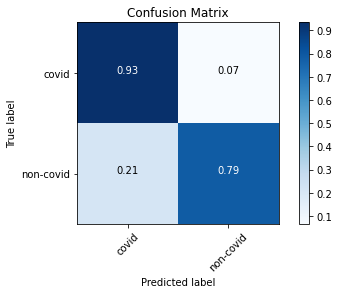

In [76]:
plot_confusion_matrix(y_test, np.round(model.predict(X_test).reshape(1, 137)[0]), encoder.classes_)